<a href="https://colab.research.google.com/github/Viny2030/Aconcagua/blob/main/rg_01_sklear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Regresión**


# ***Modelos de Regresion***

***Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.***


https://intel.github.io/scikit-learn-intelex/latest/quick-start.html


## **Bibliotecas**

### **Instalando bibliotecas**

In [1]:
!pip install plotly --upgrade

### **Análisis de datos**

In [2]:
import numpy as np
import pandas as pd
from math import sqrt

### **Gráficos**

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

### **Preprocesado y modelado**

In [4]:
!pip install scikit-learn-intelex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 15.6 MB/s eta 0:00:00


In [5]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#### **Con Scikit-learn**

In [138]:
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### **Metricas**

In [139]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
import sys



In [142]:
sys.version

'3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]'

# Acelere Scikit-Learn para el análisis de datos y el aprendizaje automático

Scikit-learn* (a menudo denominado sklearn ) es un módulo de Python* para el aprendizaje automático. La extensión Intel® para Scikit-learn* acelera sin problemas sus aplicaciones de scikit-learn para CPU y GPU Intel en configuraciones de uno o varios nodos. Este paquete de extensión aplica parches dinámicos a los estimadores de scikit-learn y, al mismo tiempo, mejora el rendimiento de sus algoritmos de aprendizaje automático.

La extensión es parte de las herramientas de IA que brindan flexibilidad para usar herramientas de aprendizaje automático con sus paquetes de IA existentes.

Usando scikit-learn con esta extensión, puedes:

Acelere el entrenamiento y la inferencia hasta 100 veces con la precisión matemática equivalente.
Continúe utilizando la API scikit-learn de código abierto.
Habilite y deshabilite la extensión con un par de líneas de código o en la línea de comando.
Tanto scikit-learn como Intel Extension para Scikit-learn son parte del conjunto integral de herramientas y recursos de desarrollo de inteligencia artificial y aprendizaje automático de Intel® .

## **Conjunto de Datos**

In [11]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/publicidad_multiple.csv"

## ***Dataframe***

In [12]:
datos = pd.read_csv(url, index_col = 0)

In [13]:
datos.head(10)

,ventas,radio,tv,periodico
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ventas     200 non-null    float64
 1   radio      200 non-null    float64
 2   tv         200 non-null    float64
 3   periodico  200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## **Relación entre variables**

***El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.***

In [15]:
corr_matrix = round(datos.corr(),3)

### **Matriz de correlaciones**

In [16]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto = True,
          template = "gridon",
          labels={"color":"Coeficiente"})

### **Estadisticas descriptivas del conjunto de datos**

In [17]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
ventas,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
tv,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
periodico,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [18]:
for i in datos.columns:
  print(f"{i}:\n   count: {len(datos[i])},\n   mean: {round(datos[i].mean(),2)}\n   median: {round(datos[i].median(),2)}\n   std: {round(datos[i].std(),2)}\n")


ventas:
   count: 200,
   mean: 147.04
   median: 149.75
   std: 85.85

radio:
   count: 200,
   mean: 23.26
   median: 22.9
   std: 14.85

tv:
   count: 200,
   mean: 30.55
   median: 25.75
   std: 21.78

periodico:
   count: 200,
   mean: 14.02
   median: 12.9
   std: 5.22



In [19]:
# Assuming 'datos' is your DataFrame and 'i' holds the title
fig = px.scatter_matrix(datos,
                   dimensions=["radio","tv","periodico", "ventas"],  # Specify columns to include in the matrix
                   template="gridon",
                   title=i)

fig.show()

### **Gráfico de distribución para cada variable numérica**

In [20]:
datos.columns

Index(['ventas', 'radio', 'tv', 'periodico'], dtype='object')

In [21]:
datos.columns[1:4]

Index(['radio', 'tv', 'periodico'], dtype='object')

In [22]:
for i in datos.columns[1:4]:
  fig = px.scatter(datos,
                   x = i,
                   y = datos.ventas,
                   template = "gridon",
                   title = i)

  fig.show()

## ***Ajuste del modelo***

**Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.**


### **División de los datos en train y test**

In [23]:
X = datos[["radio","tv","periodico"]]
y = datos[["ventas"]]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 12345)

https://intel.github.io/scikit-learn-intelex/latest/installation.html


### **Creación del modelo**

### **Decision Tree Regressor**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor


https://pypi.org/project/scikit-learn-intelex/

In [26]:
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [144]:
!pip install dpctl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 50.2 MB/s eta 0:00:00


In [150]:
!pip install dpctl

In [155]:
import numpy as np
##import dpctl
from sklearnex import patch_sklearn, config_context
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
modelo = DecisionTreeRegressor(max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [29]:
modelo

DecisionTreeRegressor(max_depth=3, random_state=0)

In [30]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

#### ***Información del modelo***

In [31]:
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Coeficiente de determinación R^2: 0.7818883644643493


### **Predicción**

In [32]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[253.48823529 132.99230769  62.77058824]


In [33]:
X_test["Ventas"] = y_test
X_test["Prediccion"] = predicciones
X_test.head(9)

,radio,tv,periodico,Ventas,Prediccion
52,41.7,39.6,22.6,216.4,253.488235
157,1.3,24.3,10.1,149.8,132.992308
135,47.0,8.5,11.6,48.3,62.770588
140,17.0,12.9,10.9,73.4,62.770588
56,28.1,41.4,5.5,7.3,15.830769
95,31.6,52.9,16.9,163.3,162.046667
54,28.8,15.9,20.2,262.7,253.488235
50,3.1,34.6,11.4,199.8,132.992308
17,39.6,55.8,24.4,281.4,253.488235


### **Evaluacion del modelo**

#### **Error de la media de los cuadrados - MSE**

In [34]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

#### **Error de la media absoluta - MAE**


In [35]:
round(metrics.median_absolute_error(y_test, predicciones),3)

21.172

#### **Coeficiente de determinación ($R^2$)**


In [36]:
round(metrics.r2_score(y_test, predicciones),3)

0.757

## **Graficando el modelo**

In [37]:
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


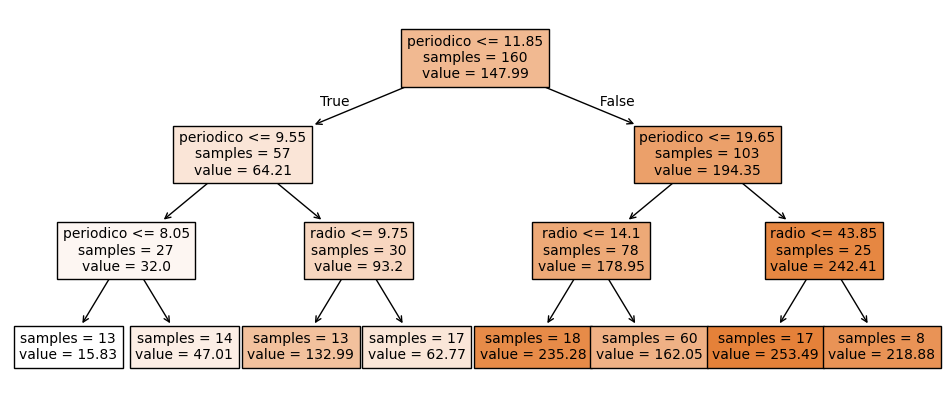

In [38]:
fig, ax = plt.subplots(figsize=(12, 5))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax)

## **Graficando Residuos**

In [39]:
from sklearn.metrics import PredictionErrorDisplay

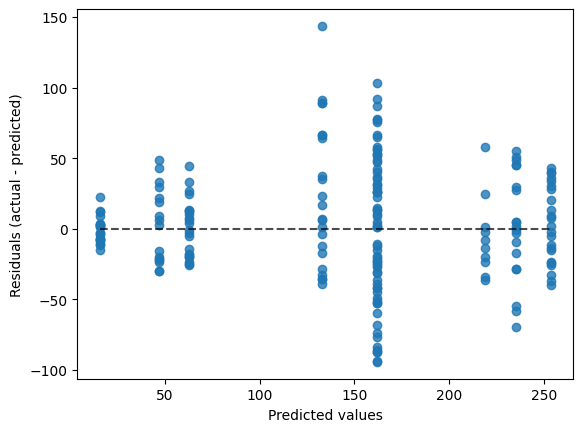

In [40]:
y_true = y['ventas'].values  # Asumo ventas como variable objetivo con sus valores

# Uso el reshape para graficas
disp = PredictionErrorDisplay.from_estimator(modelo, X, y_true)
plt.show()

## **Graficando predicciones y residuos**

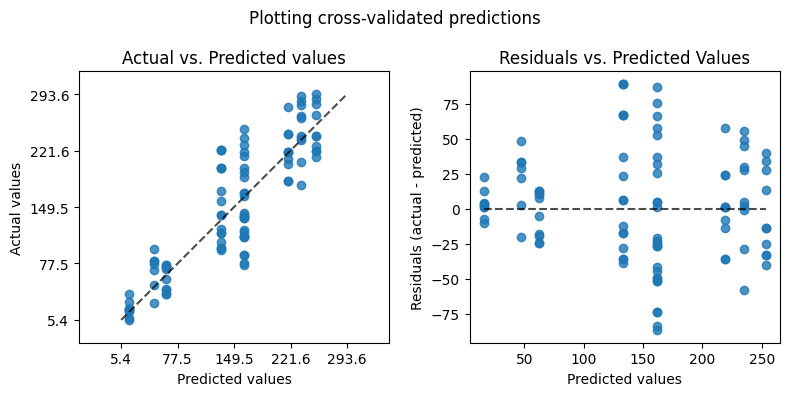

In [41]:
from sklearn.metrics import PredictionErrorDisplay


y_true = y['ventas'] # Asumo ventas como variable objetivo

# Now use the reshaped y_true for plotting
y_pred = modelo.predict(X)  # Calculo la prediccion

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de las variables**

In [42]:
!pip install mljar-scikit-plot

  Preparing metadata (setup.py) ... done
  Created wheel for mljar-scikit-plot: filename=mljar_scikit_plot-0.3.12-py3-none-any.whl size=32014 sha256=116aa656a9d81878fc2f60aead3121c14193a0978ab5ba2ea65557d61696e12c
  Stored in directory: /root/.cache/pip/wheels/f1/02/59/22b0e9bcc992a79df54193032d45720f9713bd3065617ef4a5
Successfully built mljar-scikit-plot


In [43]:
import scikitplot as skplt

<Axes: title={'center': 'Feature Importance Decision Tree Regressor'}>

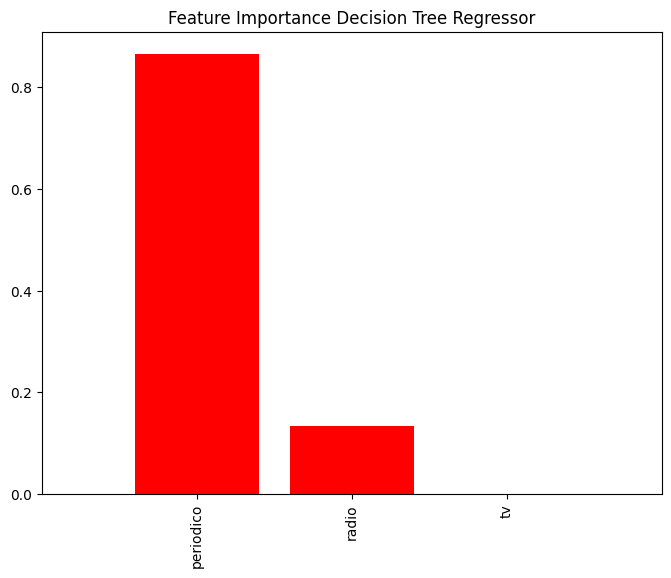

In [44]:
skplt.estimators.plot_feature_importances(
 modelo,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance Decision Tree Regressor",
 x_tick_rotation=90,
)

## **Importancia de predictores**

**La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.**

In [45]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.866105
0,radio,0.133895
1,tv,0.000000


In [46]:
modelo = modelo.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 33.59260590390003
MSE: 2180.8052228044044
RMSE: 46.69909231242514
MEDIAN ABSOLUTE ERROR: 21.172115384615385
Coeficiente de determinación R^2: 0.7818883644643493
Explained_variance_score: 0.7882027826698654
Max Error: 143.7076923076923


<Axes: title={'center': 'Feature Importance XGB Classifier'}>

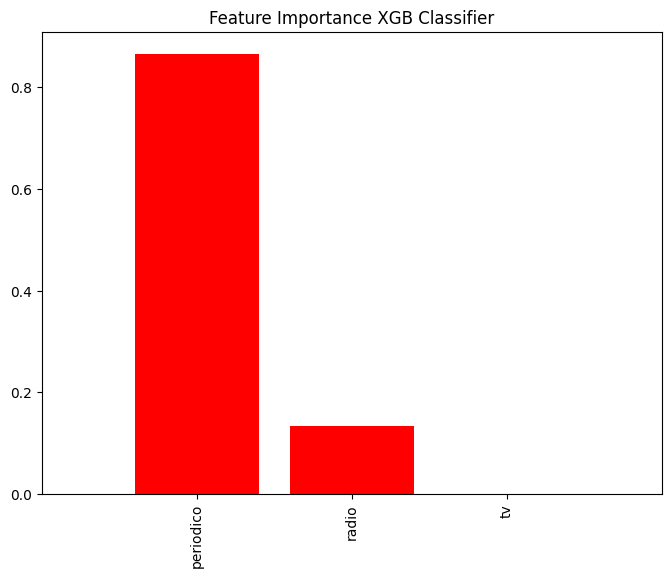

In [47]:
skplt.estimators.plot_feature_importances(
 modelo,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance XGB Classifier",
 x_tick_rotation=90,
)

### **Optimizacion Arbol de Decision**

In [48]:
params = {'criterion': ['squared_error'], 'splitter': ['best'], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [49]:
grid = GridSearchCV(estimator=modelo, param_grid=params, cv=5)


In [50]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [51]:
grid =  GridSearchCV(estimator=modelo, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid.score(X, y))


MAE: 16.7875
MSE: 599.11775
RMSE: 24.476881950117747
MEDIAN ABSOLUTE ERROR: 10.049999999999997
Coeficiente de determinación R^2: 0.9836621222316551


## **Graficando el modelo optimizado**

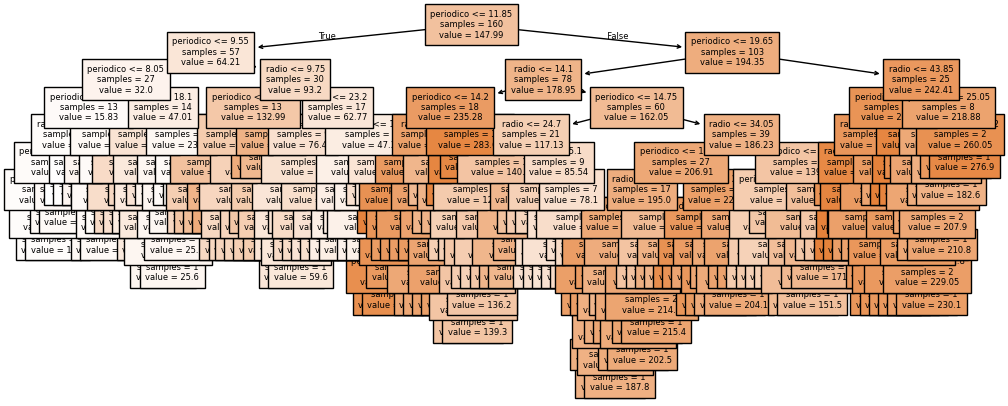

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))


plot = plot_tree(
            decision_tree = grid.best_estimator_,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 6,
            precision     = 2,
            ax            = ax)

In [53]:
from sklearn.metrics import PredictionErrorDisplay

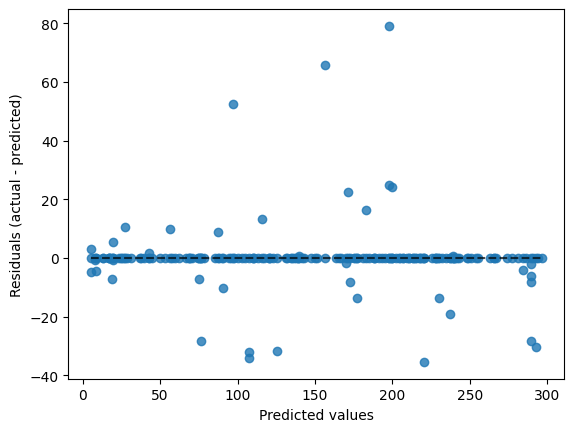

In [54]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(grid, X, y_true)
plt.show()

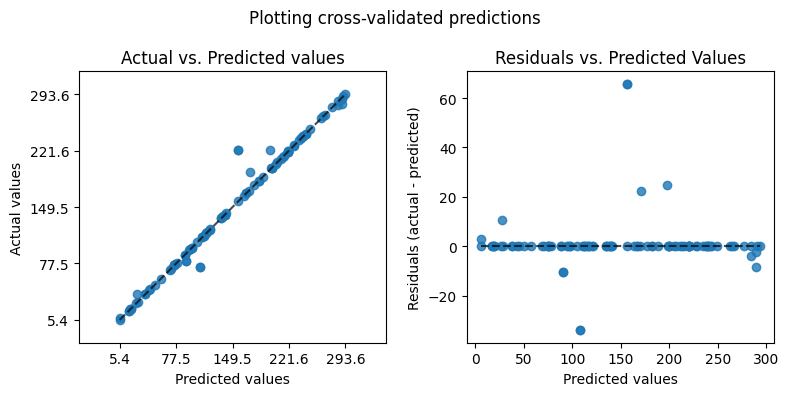

In [55]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = grid.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [157]:
from sklearnex import patch_sklearn
# The names match scikit-learn estimators
patch_sklearn("RandomForestRegressor")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


modelo = DecisionTreeRegressor(max_depth=3, random_state=0)

In [158]:
modelo1 = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=0)


In [159]:
modelo1.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [160]:
modelo1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_bins': 256,
 'max_depth': 2,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_bin_size': 1,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [161]:
print("Coeficiente de determinación R^2:", modelo1.score(X, y))

Coeficiente de determinación R^2: 0.6852075409772205


In [61]:
modelo1 = modelo1.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo1.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 46.07827114045635
MSE: 3479.047296965304
RMSE: 58.98344934780692
MEDIAN ABSOLUTE ERROR: 34.292778749783636
Coeficiente de determinación R^2: 0.6852075409772205
Explained_variance_score: 0.6457105389514763
Max Error: 149.84416083130793


In [62]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

## **Importancia de predictores**

In [63]:
importancia_predictores1 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo1.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores1.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.986442
0,radio,0.013558
1,tv,0.000000


<Axes: title={'center': 'Feature Importance Random Forest Regressor'}>

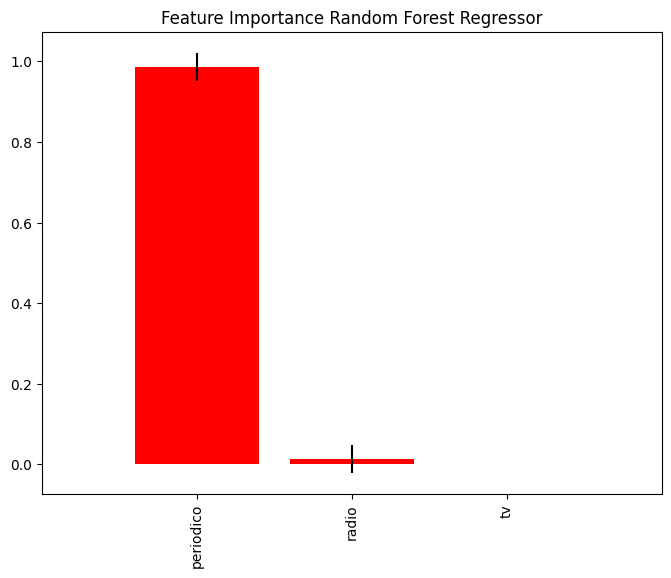

In [64]:
skplt.estimators.plot_feature_importances(
 modelo1,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance Random Forest Regressor",
 x_tick_rotation=90,
)

## **Graficando el modelo**

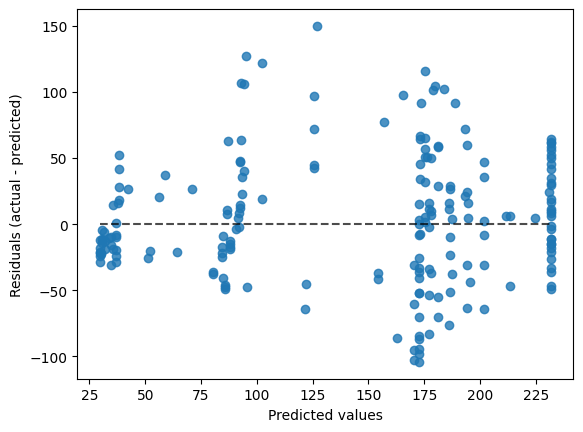

In [65]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo1, X, y_true)
plt.show()

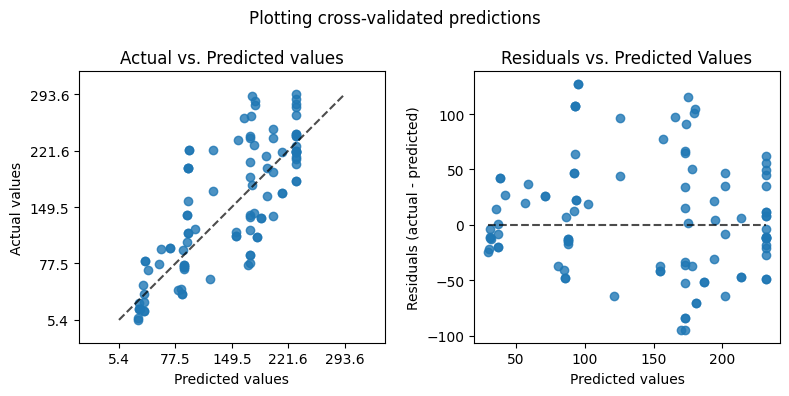

In [66]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo1.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

### **Optimizacion random forest**

In [67]:
params = {'criterion': ['squared_error'], 'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [68]:
grid1 = GridSearchCV(estimator=modelo1, param_grid=params, cv=5)

In [69]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=2, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [None]})

In [70]:
grid1 =  GridSearchCV(estimator=modelo1, param_grid=params, cv=5)
grid1.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid1.score(X, y))


MAE: 15.935037499999968
MSE: 546.0595473812498
RMSE: 23.367917052686785
MEDIAN ABSOLUTE ERROR: 8.886750000000008
Coeficiente de determinación R^2: 0.9788671947623178


### **GradientBoostingRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


In [71]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
modelo2 = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=0)

In [73]:
modelo2.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, random_state=0)

In [74]:
modelo2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [75]:
print("Coeficiente de determinación R^2:", modelo2.score(X, y))

Coeficiente de determinación R^2: 0.9513329326711035


In [76]:
predicciones2 = modelo2.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones2[0:3,])

[220.92162461 103.37823289  46.53441296]


In [77]:
round(sqrt(mean_squared_error(y_test, predicciones2)),3)

30.547

In [78]:
round(metrics.median_absolute_error(y_test, predicciones2),3)

19.239

In [79]:
modelo2 = modelo2.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo2.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 22.74762422434423
MSE: 933.1237329837386
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 19.238624014503205
Coeficiente de determinación R^2: 0.9513329326711035
Explained_variance_score: 0.9013130032039502
Max Error: 113.65279617979812


## **Graficando el modelo**

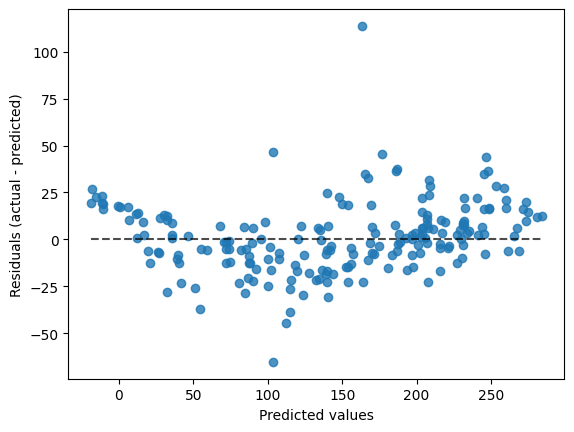

In [80]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo2, X, y_true)
plt.show()

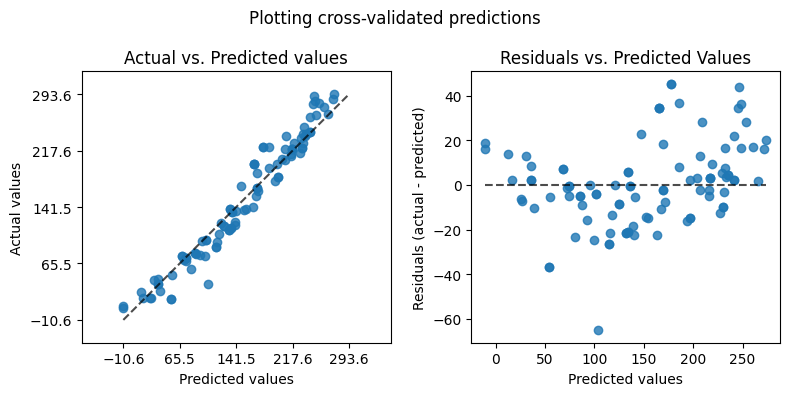

In [81]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo2.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [82]:
importancia_predictores2 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo2.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores2.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.769381
0,radio,0.227618
1,tv,0.003001


<Axes: title={'center': 'Feature Importance GradientBoostingRegressor'}>

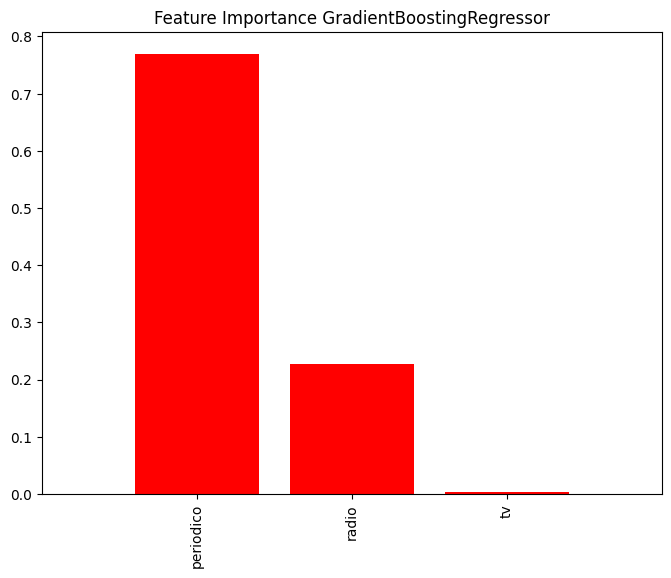

In [83]:
skplt.estimators.plot_feature_importances(
 modelo2,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance GradientBoostingRegressor",
 x_tick_rotation=90,
)

### **Optimizacion GradientBoostingRegressor**

In [84]:
params = {'criterion': ['squared_error'], 'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [85]:
grid2 = GridSearchCV(estimator=modelo2, param_grid=params, cv=5)

In [86]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=2, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [None], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'random_state': [None]})

In [87]:
grid2 =  GridSearchCV(estimator=modelo2, param_grid=params, cv=5)
grid2.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid2.score(X, y))

MAE: 15.196911100009533
MSE: 488.94238485746354
RMSE: 22.112041625717502
MEDIAN ABSOLUTE ERROR: 10.472050531535825
Coeficiente de determinación R^2: 0.9866665922706259


### **AdaBoostRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [88]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [89]:
modelo3 = AdaBoostRegressor(random_state=0, n_estimators=100)
modelo3.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [90]:
print("Coeficiente de determinación R^2:", modelo3.score(X, y))

Coeficiente de determinación R^2: 0.9143150616872552


In [91]:
predicciones3 = modelo3.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones3[0:3,])

[238.46       134.57        76.65714286]


In [92]:
round(sqrt(mean_squared_error(y_test, predicciones3)),3)

29.563

In [93]:
round(metrics.median_absolute_error(y_test, predicciones3),3)

22.162

In [94]:
warnings.filterwarnings('ignore')

In [95]:
modelo3 = modelo3.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo3.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 24.558887745805045
MSE: 873.9915922256238
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 22.16166666666666
Coeficiente de determinación R^2: 0.9143150616872552
Explained_variance_score: 0.9027134208984695
Max Error: 79.87500000000003


## **Graficando el modelo**

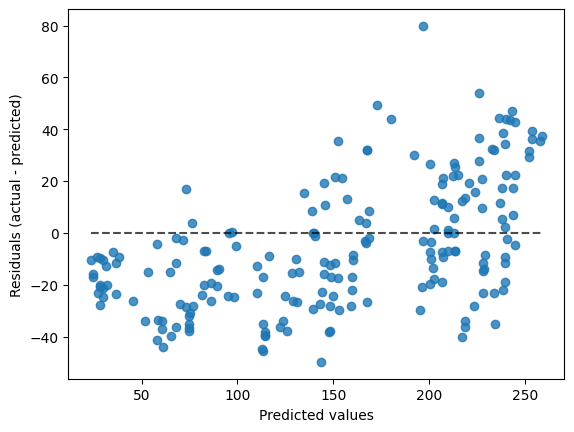

In [96]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo3, X, y_true)
plt.show()

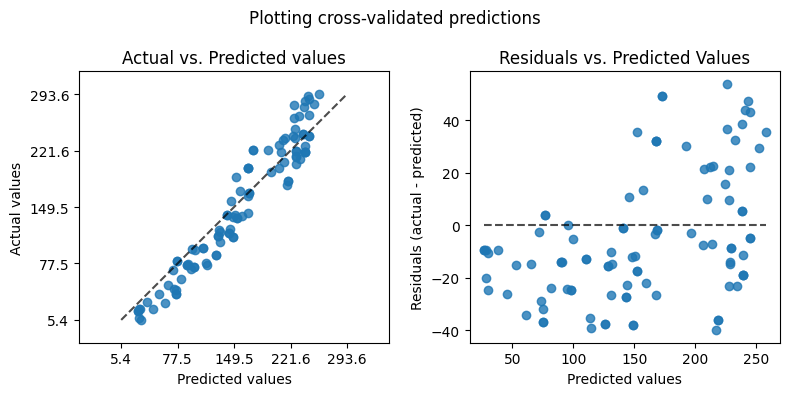

In [97]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo3.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [98]:
importancia_predictores3 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo3.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores3.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.643396
0,radio,0.309512
1,tv,0.047092


<Axes: title={'center': 'Feature Importance  AdaBoostRegressor'}>

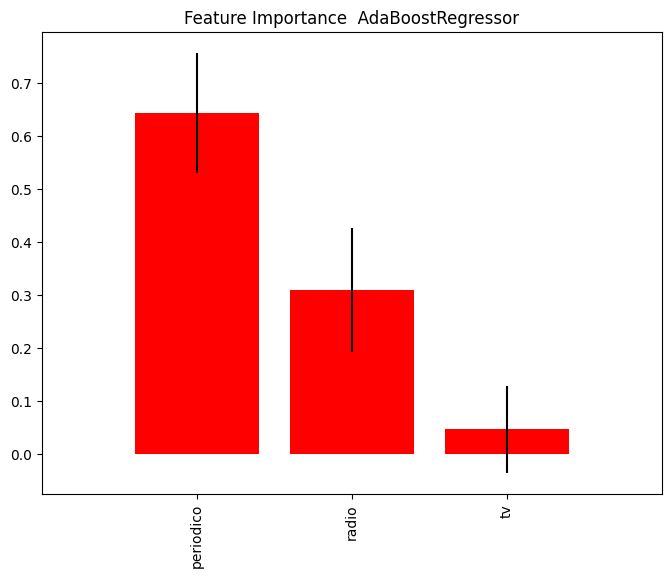

In [99]:
skplt.estimators.plot_feature_importances(
 modelo3,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance  AdaBoostRegressor",
 x_tick_rotation=90,
)

### **Optimizacion AdaBoostRegressor**

In [100]:
params = {'n_estimators': [50], 'learning_rate':[1.0], 'loss': ['linear']}  # Removed 'criterion'

In [101]:
grid3 = GridSearchCV(estimator=modelo3, param_grid=params, cv=5)

In [102]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(n_estimators=100, random_state=0),
             param_grid={'learning_rate': [1.0], 'loss': ['linear'],
                         'n_estimators': [50]})

In [103]:
grid3 =  GridSearchCV(estimator=modelo3, param_grid=params, cv=5)
grid3.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid3.score(X, y))

MAE: 24.82616109373753
MSE: 896.8012676015896
RMSE: 29.94664033913637
MEDIAN ABSOLUTE ERROR: 20.853571428571428
Coeficiente de determinación R^2: 0.9136618213079049


### **ExtraTreeRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

In [104]:
from sklearn.ensemble import ExtraTreesRegressor

In [105]:
modelo4 = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
   X_train, y_train)

In [106]:
modelo4

ExtraTreesRegressor(random_state=0)

In [107]:
modelo4 = modelo4.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo4.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 11.721687500000002
MSE: 338.4166149937499
RMSE: 18.396103255682977
MEDIAN ABSOLUTE ERROR: 6.932500000000015
Coeficiente de determinación R^2: 0.9907707217857771
Explained_variance_score: 0.9654001104918049
Max Error: 73.41299999999998


## **Graficando el modelo**

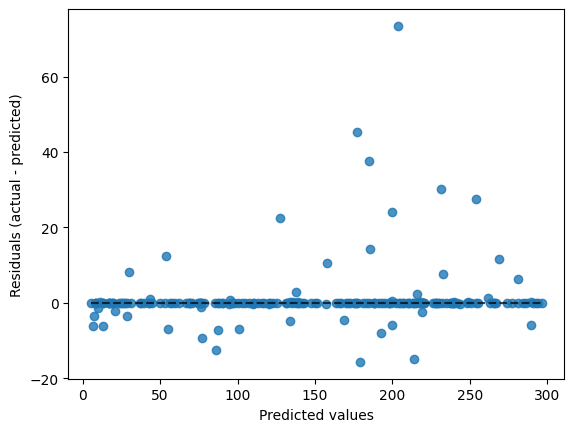

In [108]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo4, X, y_true)
plt.show()

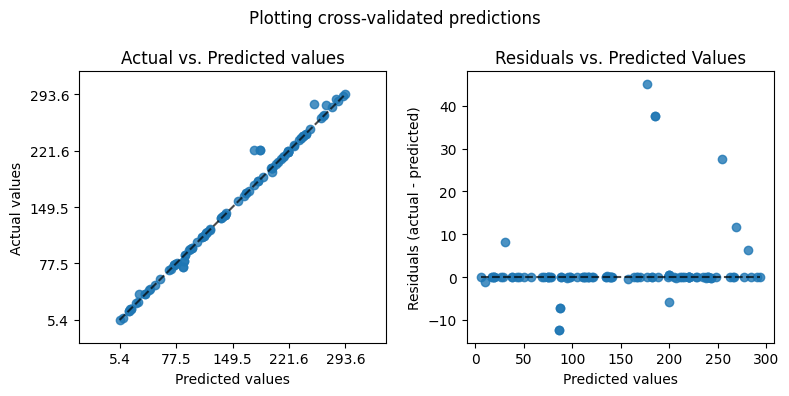

In [109]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo4.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## **Importancia de predictores**

In [110]:
importancia_predictores4 = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo4.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores4.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.743727
0,radio,0.242501
1,tv,0.013772


<Axes: title={'center': 'Feature Importance ExtraTreesRegressor'}>

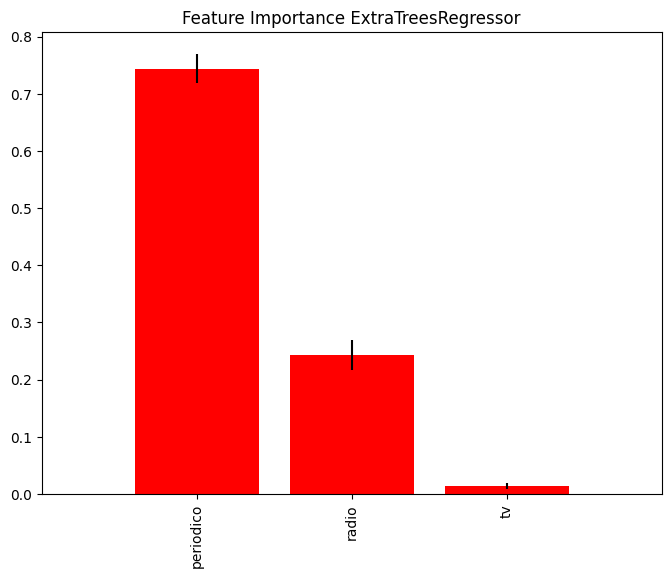

In [111]:
skplt.estimators.plot_feature_importances(
 modelo4,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance ExtraTreesRegressor",
 x_tick_rotation=90,
)

### **Optimizacion ExtratreeRegressor**

In [112]:
params = {'n_estimators': [100], 'criterion': ['squared_error']}  # Removed 'criterion'

In [113]:
grid4 = GridSearchCV(estimator=modelo4, param_grid=params, cv=5)

In [114]:
grid4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=0),
             param_grid={'criterion': ['squared_error'], 'n_estimators': [100]})

In [115]:
grid4 =  GridSearchCV(estimator=modelo4, param_grid=params, cv=5)
grid4.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid4.score(X, y))

MAE: 11.721687500000002
MSE: 338.4166149937499
RMSE: 18.396103255682977
MEDIAN ABSOLUTE ERROR: 6.932500000000015
Coeficiente de determinación R^2: 0.9907707217857771


In [116]:
predicciones4 = modelo4.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones4[0:3,])

[218.827 127.26   55.262]


In [117]:
datos.ventas.head(3)

,ventas
0,230.1
1,44.5
2,17.2


**HistGradientBoostingRegressor**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html

In [118]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [119]:
modelo5 = HistGradientBoostingRegressor(max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0).fit(X, y)

In [120]:
modelo5

HistGradientBoostingRegressor()

In [121]:
modelo5 = modelo5.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo5.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 23.283235505463153
MSE: 939.0113945044271
RMSE: 30.64329281432443
MEDIAN ABSOLUTE ERROR: 17.608254914273378
Coeficiente de determinación R^2: 0.9530505888855769
Explained_variance_score: 0.9073664059399849
Max Error: 75.00690236918436


## **Graficando el modelo**

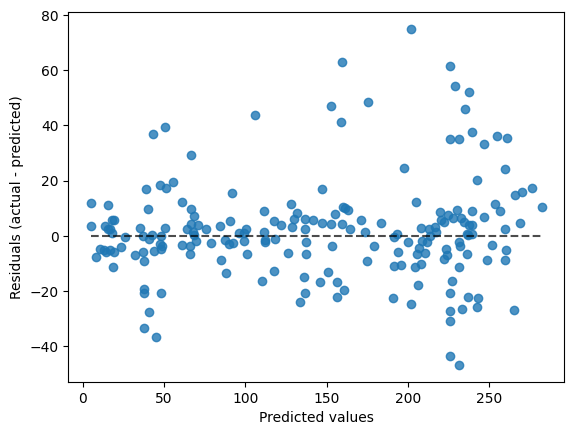

In [122]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(modelo5, X, y_true)
plt.show()

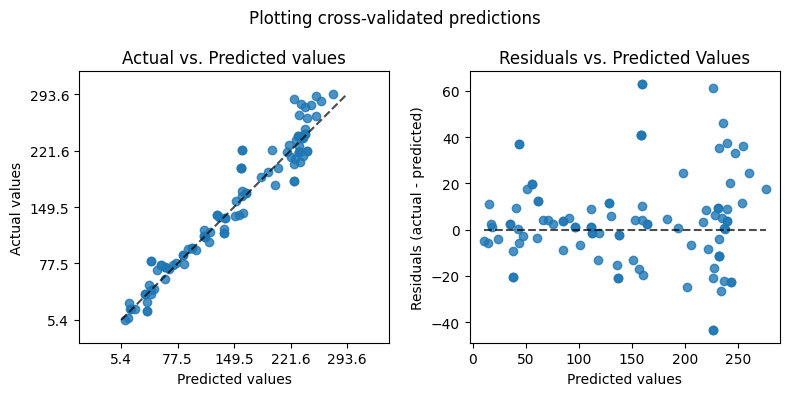

In [123]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = modelo5.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## ** NO hay Importancia de predictores en este Modelo**

### **Optimizacion HistGradientBoostingRegressor**

In [124]:
params = {'loss':['squared_error'], 'learning_rate': [1.0],'max_iter':[100], 'max_leaf_nodes':[31], 'max_depth':[None]}

In [125]:
grid5 = GridSearchCV(estimator=modelo5, param_grid=params, cv=5)

In [126]:
grid5.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [1.0], 'loss': ['squared_error'],
                         'max_depth': [None], 'max_iter': [100],
                         'max_leaf_nodes': [31]})

In [127]:
grid5 =  GridSearchCV(estimator=modelo5, param_grid=params, cv=5)
grid5.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid5.score(X, y))

MAE: 27.827216963053253
MSE: 1456.5931783122076
RMSE: 38.16534001305645
MEDIAN ABSOLUTE ERROR: 20.08646425088716
Coeficiente de determinación R^2: 0.9565626047446759


In [128]:
predicciones5 = modelo5.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones5[0:3,])

[242.41647525 106.16413136  48.49784649]


### **Ensamble de modelos**

##Utilizo el algoritmo Voting Regressor para englobar los modelos

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor

###Regresor de votación de predicción para estimadores no ajustados.

###Un regresor con votación es un metaestimador de conjunto que ajusta varios regresores base, cada uno de ellos sobre el conjunto de datos completo. Luego, promedia las predicciones individuales para formar una predicción final.

In [129]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor





In [130]:
models = [('modelo', modelo),('modelo1', modelo1), ('modelo2', modelo2), ('modelo3', modelo3), ('modelo4', modelo4)]
# The VotingRegressor expects a list of (name, estimator) tuples.
# This change provides names for each estimator in the list.
model = VotingRegressor(estimators=models)
model.fit(X, y)

VotingRegressor(estimators=[('modelo',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=0)),
                            ('modelo1',
                             RandomForestRegressor(max_depth=2,
                                                   random_state=0)),
                            ('modelo2',
                             GradientBoostingRegressor(max_depth=2,
                                                       random_state=0)),
                            ('modelo3',
                             AdaBoostRegressor(n_estimators=100,
                                               random_state=0)),
                            ('modelo4', ExtraTreesRegressor(random_state=0))])

In [131]:
models = model.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, model.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, model.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, model.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", model.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, model.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, model.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 24.847405974271737
MSE: 1147.2569375843223
RMSE: 33.871181520347385
MEDIAN ABSOLUTE ERROR: 17.246572724629914
Coeficiente de determinación R^2: 0.9186642455137315
Explained_variance_score: 0.8821661285995808
Max Error: 112.09852986375967


## **Graficando el modelo**

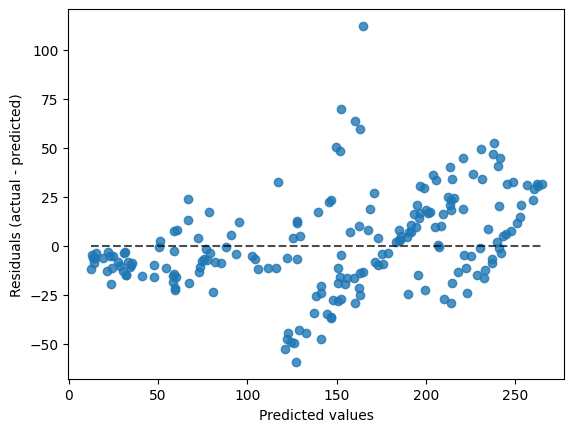

In [132]:
y_true = y['ventas'].values  # Assuming 'ventas' is the name of your target column

# Now use the reshaped y_true for plotting
disp = PredictionErrorDisplay.from_estimator(model, X, y_true)
plt.show()

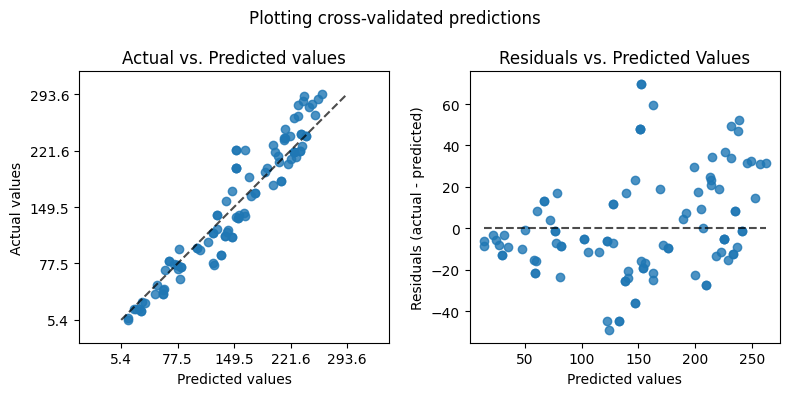

In [133]:
from sklearn.metrics import PredictionErrorDisplay

# Assuming 'modelo' is your trained model, 'X' is your feature data,
# and 'y' is your target DataFrame

# Extract the target column as a Series or 1D array
y_true = y['ventas']  # Assuming 'ventas' is the target column name

# Now use the reshaped y_true for plotting
y_pred = model.predict(X)  # Calculate predicted values

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true,  # Use the extracted target column
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

## Este modelo de ensamble NO tiene importancia de predictores ni calculo ni grafico

### **Comparacion de Modelos**

In [134]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    pass

# Defino la lista de modelos
models = [modelo,modelo1, modelo2, modelo3, modelo4, modelo5]

# evaluo los modelos en entrenamiento y testeo
evaluate_models(models=models,
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico']) # Assuming these are your feature names

In [135]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # Entreno el modelo
        model.fit(X_train, y_train)

        # hago la prediccion con el  conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo las metrica
        print(f"\nModel {i} model:", type(model).__name__)
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # entreno el modelo
        model.fit(X_train, y_train)

        # Hago las predicciones del conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo la performance de las metricas
        print(f"\nModel {i} model:", type(model).__name__)
        print(f"MAE:", mean_absolute_error(y_test, y_pred))
        print(f"MSE:", mean_squared_error(y_test, y_pred))
        print("Coeficiente de determinación R^2:", sorted([r2_score(y_test, y_pred)]))
        # ... (rest of the metrics) ...

# evaluo cada modelo y su metrica
evaluate_models(models=[modelo,modelo1, modelo2, modelo3, modelo4, modelo5],
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico'])



Model 0 model: DecisionTreeRegressor
MAE: 33.59260590390003
MSE: 2180.8052228044044
Coeficiente de determinación R^2: [0.7568604020369176]

Model 1 model: RandomForestRegressor
MAE: 46.07827114045635
MSE: 3479.047296965304
Coeficiente de determinación R^2: [0.6121184266099126]

Model 2 model: GradientBoostingRegressor
MAE: 22.74762422434423
MSE: 933.1237329837386
Coeficiente de determinación R^2: [0.8959653402720112]

Model 3 model: AdaBoostRegressor
MAE: 24.558887745805045
MSE: 873.9915922256238
Coeficiente de determinación R^2: [0.902558026670724]

Model 4 model: ExtraTreesRegressor
MAE: 11.721687500000002
MSE: 338.4166149937499
Coeficiente de determinación R^2: [0.9622696796333803]

Model 5 model: HistGradientBoostingRegressor
MAE: 23.283235505463153
MSE: 939.0113945044271
Coeficiente de determinación R^2: [0.8953089205055352]


### **Comparacion de Modelos Optimizados**

In [136]:
def evaluate_grids(grids, X_train, y_train, X_test, y_test, feature_names):
    pass

# Defino la lista de modelos
models = [grid,grid1, grid2, grid3, grid4, grid5]

# evaluo los modelos en entrenamiento y testeo
# Change 'models=' to 'grids=' to match the function definition
evaluate_grids(grids=models,
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico']) # Assuming these are your feature names

In [137]:
# Assuming 'grid' is an example of one of your GridSearchCV objects
grid = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={'n_estimators': [100, 200, 300]},  # Ensure n_estimators are integers
    cv=5
)

# ... (rest of your code) ...

# Within evaluate_models function:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # entreno el modelo
        model.fit(X_train, y_train) # model should be used here, not just 'grid'

        # Hago las predicciones del conjunto de testeo
        # Uso el vector de entrada
        y_pred = model.predict(X_test[feature_names])

        # Calculo e imprimo la performance de las metricas
        print(f"\nModel {i} grid:", type(model).__name__) # model type, not grid
        print(f"MAE:", mean_absolute_error(y_test, y_pred))
        print(f"MSE:", mean_squared_error(y_test, y_pred))
        print("Coeficiente de determinación R^2:", sorted([r2_score(y_test, y_pred)]))
        # ... (rest of the metrics) ...
evaluate_models(models=[grid,grid1, grid2, grid3, grid4, grid5], # Changed 'grids=' to 'models='
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico'])


Model 0 grid: GridSearchCV
MAE: 16.093716666666726
MSE: 551.816636075002
Coeficiente de determinación R^2: [0.9384775524005382]

Model 1 grid: GridSearchCV
MAE: 16.15726249999998
MSE: 562.1386757312498
Coeficiente de determinación R^2: [0.9373267405142058]

Model 2 grid: GridSearchCV
MAE: 15.2920441094757
MSE: 546.4987582219935
Coeficiente de determinación R^2: [0.9390704465616841]

Model 3 grid: GridSearchCV
MAE: 24.82616109373753
MSE: 896.8012676015896
Coeficiente de determinación R^2: [0.900014958980594]

Model 4 grid: GridSearchCV
MAE: 11.721687500000002
MSE: 338.4166149937499
Coeficiente de determinación R^2: [0.9622696796333803]

Model 5 grid: GridSearchCV
MAE: 27.827216963053253
MSE: 1456.5931783122076
Coeficiente de determinación R^2: [0.8376033420741846]
